<a href="https://colab.research.google.com/github/AnantasiiaAleks/A-B_tests/blob/main/AleksandrovskayaAV_A_B_tests_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

Численные признаки: children, salary, age, home_cost, happyness

Категориальные признаки: was_married, sex, profession, drive_info

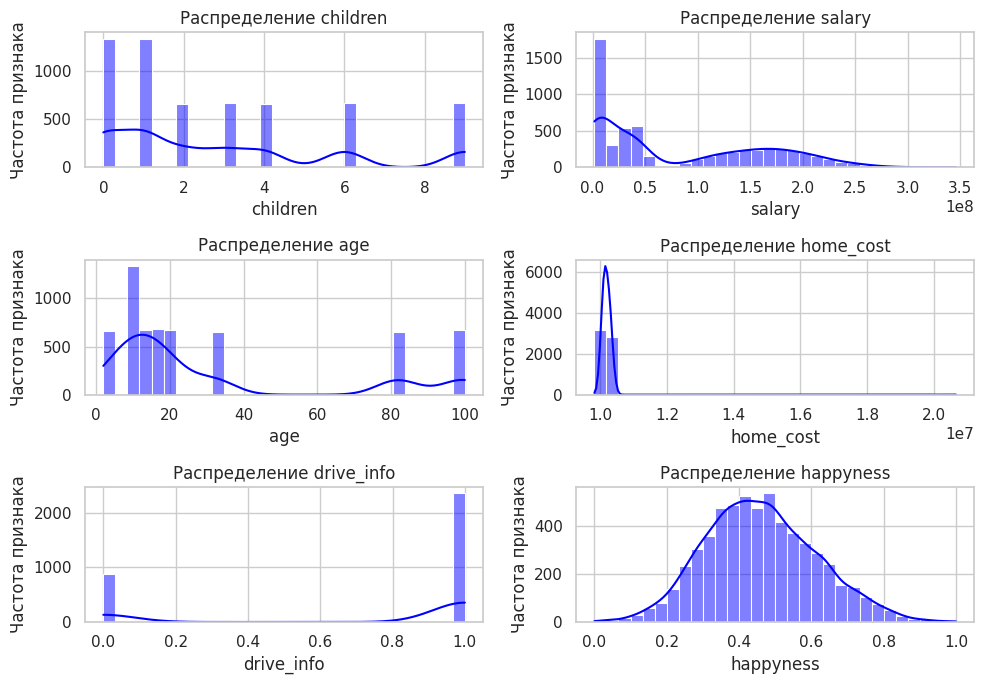

In [4]:
# Какие признаки имеют нормальное распределение?
# Для ответа на этот вопрос визуализируем каждый признак с помощью гистограммы.

columns = ['children', 'salary', 'age', 'home_cost', 'drive_info', 'happyness']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота признака')

plt.tight_layout()
plt.show()

Судя по гистограмме, нормальное распределение имеет признак happyness.  
Признак salary на первый взгляд тоже выглядит как нормальное распределение, однако наблюдается длинный "хвост" справа от пика.  
Требуется дополнительная проверка


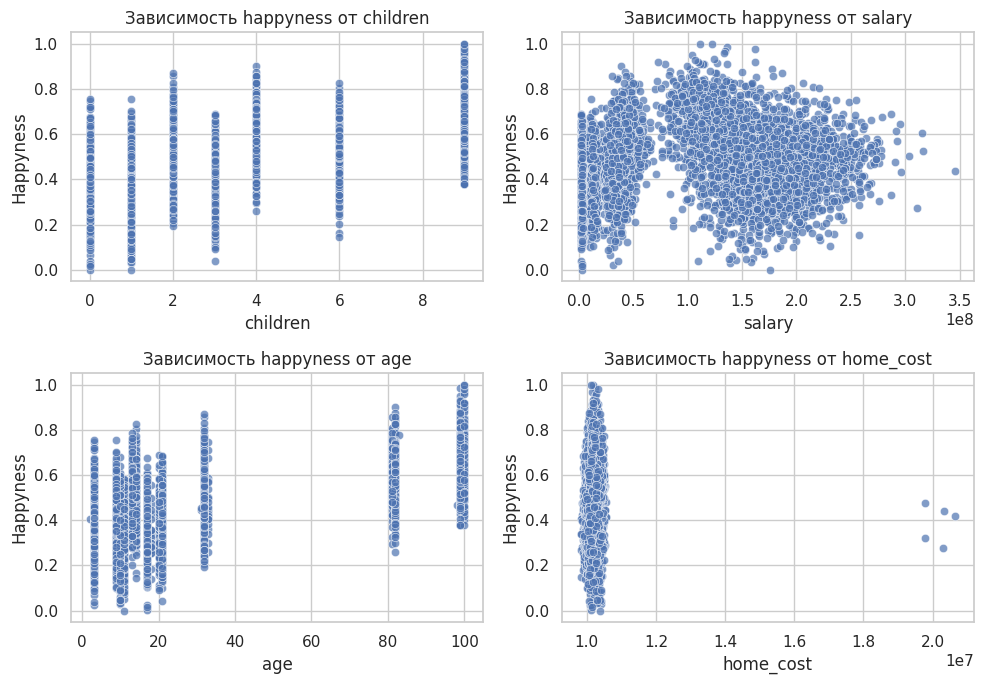

In [5]:
# Какие признаки бессмысленные?
# Построим графики зависимости ключевого признака 'happyness' от признака.

columns_rel = ['children', 'salary', 'age', 'home_cost']
# Признак 'drive_info' был исключен из проверки, поскольку содержит много Null-значений.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))


for i, col in enumerate(columns_rel, 1):
  plt.subplot(2, 2, i)
  sns.scatterplot(x=data[col], y=data['happyness'], alpha=0.7)
  plt.title(f'Зависимость happyness от {col}')
  plt.xlabel(col)
  plt.ylabel('Happyness')

plt.tight_layout()
plt.show()

Бессмысленные признаки: drive_info (слишком много Null значений) и home_cost (на скаттерплоте видно, что зависимость значения счастья от уровня зарплаты не линейная)

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`).
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [6]:

data = data.drop_duplicates()

In [7]:

data = data.dropna(axis=1)

In [8]:

Q1 = data['home_cost'].quantile(0.25)
Q3 = data['home_cost'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = data[(data['home_cost'] < lower) | (data['home_cost'] > upper)]
data = data[(data['home_cost'] >= lower) & (data['home_cost'] <= upper)]

# Количество выбросов
number_of_outliers = outliers.shape[0]
print(f"Количество выбросов по признаку home_cost: {number_of_outliers}")

Количество выбросов по признаку home_cost: 13


# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

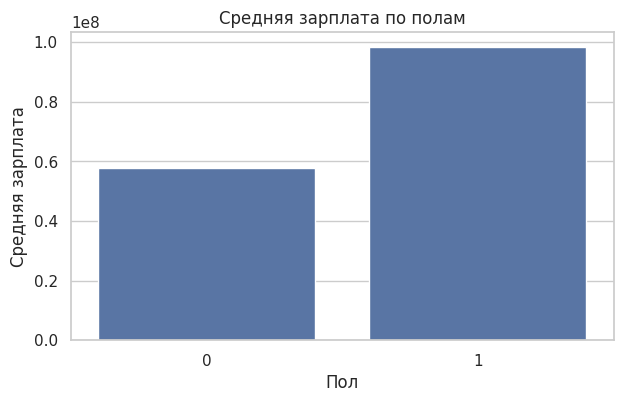

In [22]:
# Будем считать, что 0 - это женщины, 1 - это мужчины
average_salary = data.groupby('sex')['salary'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(x='sex', y='salary', data=average_salary)
plt.title('Средняя зарплата по полам')
plt.xlabel('Пол')
plt.ylabel('Средняя зарплата')
plt.show()

Очевидно, средняя зарплата мужчин (['sex']=1) выше, чем у женщин (['sex']=0)

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

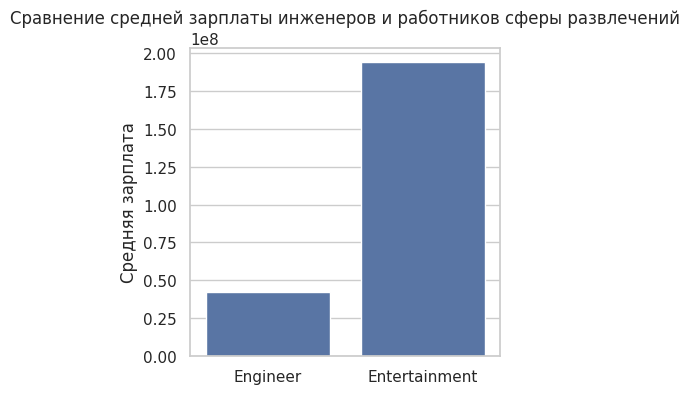

In [23]:
average_salary = data.groupby('profession')['salary'].mean().reset_index()
filtered_salary = average_salary[average_salary['profession'].isin(['Engineer', 'Entertainment'])]

plt.figure(figsize=(4, 4))
sns.barplot(x='profession', y='salary', data=filtered_salary)
plt.title('Сравнение средней зарплаты инженеров и работников сферы развлечений')
plt.xlabel('')
plt.ylabel('Средняя зарплата')
plt.show()

Работники сферы развлечений в среднем зарабатывают больше, чем инженеры

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

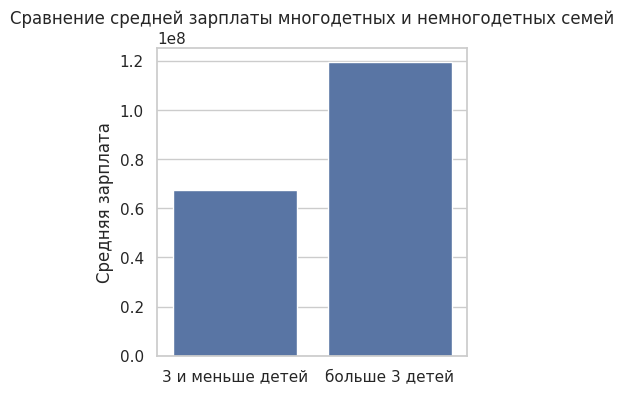

In [24]:
data['kids'] = data['children'].apply(lambda x: '3 и меньше детей' if x <= 3 else 'больше 3 детей')
average_salary = data.groupby('kids')['salary'].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x='kids', y='salary', data=average_salary)
plt.title('Сравнение средней зарплаты многодетных и немногодетных семей')
plt.xlabel('')
plt.ylabel('Средняя зарплата')
plt.show()

Да, средняя зарплата многодетных семей больше, чем в семьях, где трое и меньше детей

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

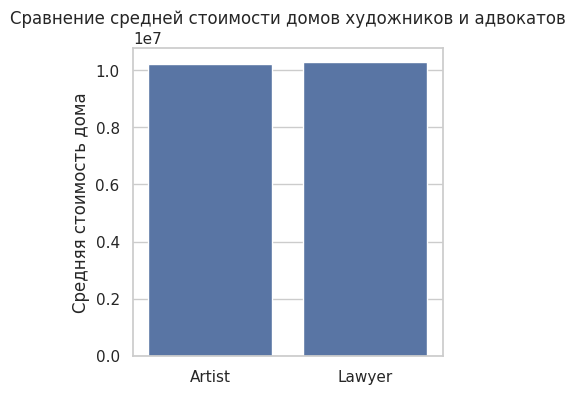

In [27]:
average_home_cost = data.groupby('profession')['home_cost'].mean().reset_index()
filtered_home_cost = average_home_cost[average_home_cost['profession'].isin(['Artist', 'Lawyer'])]

plt.figure(figsize=(4, 4))
sns.barplot(x='profession', y='home_cost', data=filtered_salary)
plt.title('Сравнение средней стоимости домов художников и адвокатов')
plt.xlabel('')
plt.ylabel('Средняя стоимость дома')
plt.show()

Средняя стоимость домов художников и адвокатов примерно равна. Требуются дополнительные исследования, чтобы определить статистическую значимость различий.

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


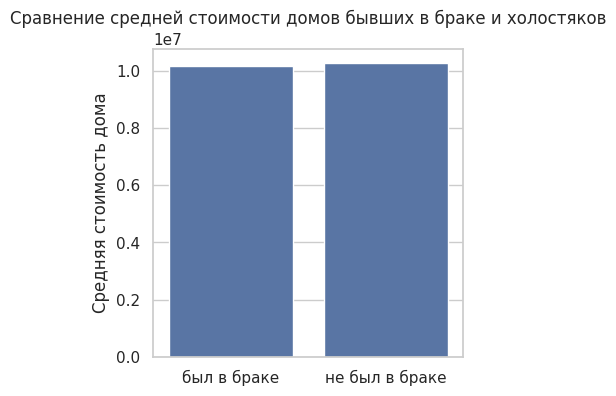

In [28]:
data['married'] = data['was_married'].apply(lambda x: 'был в браке' if x == 1 else 'не был в браке')

average_home_cost = data.groupby('married')['home_cost'].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x='married', y='home_cost', data=average_home_cost)
plt.title('Сравнение средней стоимости домов бывших в браке и холостяков')
plt.xlabel('')
plt.ylabel('Средняя стоимость дома')
plt.show()


Средняя стоимость домов бывших в браке и не бывших в браке примерно равна. Требуются дополнительные исследования, чтобы определить статистическую значимость различий.

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [ ]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [30]:
# предположим, что 0 - это женщины, 1 - это мужчины

married = data.groupby(['sex', 'was_married']).size().unstack(fill_value=0)
married.columns = ['Не был(а) в браке', 'Был(а) в браке']
married.index = ['Женщины', 'Мужчины']

print(married)

         Не был(а) в браке  Был(а) в браке
Женщины                668            1355
Мужчины                277            3687


Матрица смежности явно говорит, что мужчин, бывших в браке больше, чем женщин. И холостяков-мужчин меньше, чем не бывших замужем женщин. Однако признак требует дополнительного исследования, поскольку в датасете всего мучжин больше, чем женщин.